<a href="https://colab.research.google.com/github/santhosh1728/fun_with_nlp/blob/main/quora_nlp_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download and Exploration of Dataset**



In [1]:
!ls

sample_data  sample_submission.csv  test.csv  train.csv


In [2]:
!kaggle competitions download -c quora-insincere-questions-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.read_csv("train.csv")
df1

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [6]:
sincere_df = df1[df1.target == 0]

In [7]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [8]:
insincere_df = df1[df1.target == 1]

In [9]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [10]:
df1.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [11]:
df1.target.value_counts(normalize = True)

0    0.93813
1    0.06187
Name: target, dtype: float64

93% questons are sincere

6% questions are insincere

<Axes: >

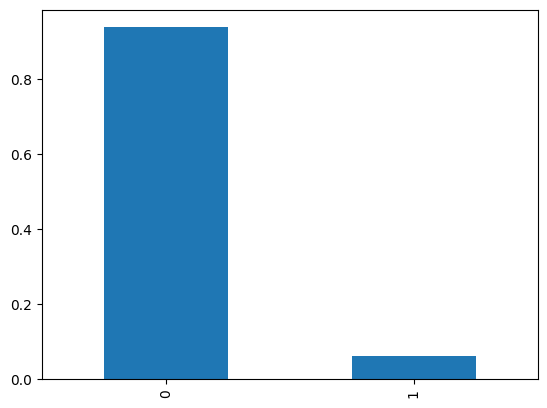

In [12]:
df1.target.value_counts(normalize = True ).plot(kind = 'bar')

In [13]:
df2 = pd.read_csv("test.csv")

In [14]:
df2

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [15]:
df3 = pd.read_csv("sample_submission.csv")

In [16]:
df3

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [17]:
SAMPLE_SIZE = 100_000

In [18]:
df3.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

In [19]:
df3 = df3.sample(SAMPLE_SIZE,random_state = 42)

In [20]:
df3

,qid,prediction
265133,b4941b50876849411426,0
374461,ff162146e9788cea52eb,0
285781,c2a33081d66d64b88397,0
311931,d46a2754eb238325c3c4,0
234025,9f3210680d7f51e0cf20,0
...,...,...
329716,e09c1bb5a8466fcd18fa,0
65838,2cd6d27c3b5b6aacb1c8,0
343729,ea45aaaeba4193248c11,0
330448,e11dde3b8f81c7f429cb,0


## **Text Preprocessing Techniques**

 Outline:


1.Understanding the bag of words

2.Tokenization

3.Stop word removal

4.Stemming



##Bag of words Intultion

1.Create a list of all the words across all the text document

2.You convert each document into vector counts of word

Limitations:

1.There may be too many words in the dataset

2.Some words may occur too freqently

3.Some words may occur very rarely or once

4.A single word may have many forms (ex: go,gone,going)


In [21]:
q0 = sincere_df.question_text.values[1]

In [22]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [23]:
q1 = df1[df1.target == 1].question_text.values[0]

In [24]:
q1

'Has the United States become the largest dictatorship in the world?'

# Tokenization

splitting a document into words and separators

In [25]:
from nltk.tokenize import word_tokenize

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [29]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [30]:
word_tokenize('this is (soemthing witb) a lot of puntuations')

['this', 'is', '(', 'soemthing', 'witb', ')', 'a', 'lot', 'of', 'puntuations']

In [31]:
q1

'Has the United States become the largest dictatorship in the world?'

In [32]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [33]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

## Stop word removal

Removing commonly occuring words

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

In [36]:
english_stopwords = stopwords.words('english')

In [37]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
",".join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [39]:
def remove_stopwords(tokens):
  return[word for word in tokens if word.lower() not in english_stopwords]


In [40]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [41]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [42]:
q0_tok = remove_stopwords(q0_tok)

In [43]:
q0_tok

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [44]:
q1

'Has the United States become the largest dictatorship in the world?'

In [45]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [46]:
q1_tok = remove_stopwords(q1_tok)

In [47]:
q1_tok

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [48]:
q0_stp = remove_stopwords(q0_tok)

In [49]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [50]:
q1_stp = remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

### **Stemming**

"go","gone","going" -> "go","birds","bird" -> "bird"


In [51]:
from nltk.stem.snowball import SnowballStemmer

In [52]:
stemmer = SnowballStemmer(language = 'english')

In [53]:
stemmer.stem('going')

'go'

In [54]:
stemmer.stem('supposedly')

'suppos'

In [55]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [56]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [57]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [58]:
q1_stm = [stemmer.stem(word) for word in q1_stp]

In [59]:
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [60]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

## Lemmatization

"love" -> "love" "loving" ->"love" "lovable"->"love"|

# Implement Bag of Words

outline:
1.create a vocabulary using Count Vectorizer

2.Transform text to vectore using Count Vectorizer

3.Configure text preprocessing in Count Vectorizer

In [61]:
df1

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [62]:
small_df = df1[:5]

In [63]:
small_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [64]:
small_df.question_text.values

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?'],
      dtype=object)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
small_vect = CountVectorizer()

In [67]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [68]:
small_vect.vocabulary_

{'how': 22,
 'did': 12,
 'quebec': 34,
 'nationalists': 29,
 'see': 35,
 'their': 39,
 'province': 33,
 'as': 6,
 'nation': 28,
 'in': 23,
 'the': 38,
 '1960s': 0,
 'do': 13,
 'you': 48,
 'have': 19,
 'an': 4,
 'adopted': 2,
 'dog': 15,
 'would': 47,
 'encourage': 16,
 'people': 32,
 'to': 41,
 'adopt': 1,
 'and': 5,
 'not': 30,
 'shop': 36,
 'why': 46,
 'does': 14,
 'velocity': 44,
 'affect': 3,
 'time': 40,
 'space': 37,
 'geometry': 17,
 'otto': 31,
 'von': 45,
 'guericke': 18,
 'used': 43,
 'magdeburg': 25,
 'hemispheres': 21,
 'can': 9,
 'convert': 11,
 'montra': 26,
 'helicon': 20,
 'mountain': 27,
 'bike': 7,
 'by': 8,
 'just': 24,
 'changing': 10,
 'tyres': 42}

In [69]:
small_vect.get_feature_names_out()

array(['1960s', 'adopt', 'adopted', 'affect', 'an', 'and', 'as', 'bike',
       'by', 'can', 'changing', 'convert', 'did', 'do', 'does', 'dog',
       'encourage', 'geometry', 'guericke', 'have', 'helicon',
       'hemispheres', 'how', 'in', 'just', 'magdeburg', 'montra',
       'mountain', 'nation', 'nationalists', 'not', 'otto', 'people',
       'province', 'quebec', 'see', 'shop', 'space', 'the', 'their',
       'time', 'to', 'tyres', 'used', 'velocity', 'von', 'why', 'would',
       'you'], dtype=object)

# Transform documents into Vectors

In [70]:
small_df.question_text

0    How did Quebec nationalists see their province...
1    Do you have an adopted dog, how would you enco...
2    Why does velocity affect time? Does velocity a...
3    How did Otto von Guericke used the Magdeburg h...
4    Can I convert montra helicon D to a mountain b...
Name: question_text, dtype: object

In [71]:
vectors  = small_vect.transform(small_df.question_text)

In [72]:
vectors

<5x49 sparse matrix of type '<class 'numpy.int64'>'
	with 55 stored elements in Compressed Sparse Row format>

In [73]:
vectors.shape

(5, 49)

In [74]:
small_df.question_text.values[0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [75]:
vectors[0].toarray()

array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

In [76]:
vectors.toarray()

array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 2],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        2, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0]])

In [77]:
vectors.shape

(5, 49)

#Configure Count Vectorizer parameters

In [78]:
stemmer = SnowballStemmer(language = 'english')

In [79]:
def tokenize(text):
  return(word for word in word_tokenize(text) )#if word.lower() not in english_stopwords)

In [80]:
tokenize('what is the real (deal) here?')

<generator object tokenize.<locals>.<genexpr> at 0x7bd0c6402960>

In [81]:
vectorizer = CountVectorizer(lowercase = True,
                             tokenizer = tokenize,
                             stop_words = english_stopwords,
                             max_features = 1000)

In [82]:
%%time
vectorizer.fit(df1.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CPU times: user 4min 9s, sys: 1.36 s, total: 4min 10s
Wall time: 5min 5s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7bd0c628f520>)

In [83]:
len(vectorizer.vocabulary_)

1000

In [84]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       ',', '-', '.', '1', '10', '100', '11', '12', '12th', '15', '2',
       '20', '2017', '2018', '3', '30', '4', '5', '50', '6', '7', '8',
       ':', '?', '[', ']', '``', 'able', 'abroad', 'accept', 'access',
       'accomplishments', 'according', 'account', 'act', 'acting',
       'actually', 'add', 'admission', 'adult', 'advanced', 'advantages',
       'advice', 'affect', 'africa', 'african', 'age', 'ago', 'air',
       'allow', 'allowed', 'almost', 'alone', 'already', 'also', 'always',
       'amazon', 'america', 'american', 'americans', 'among', 'amount',
       'analysis', 'ancient', 'android', 'animal', 'animals', 'anime',
       'another', 'answer', 'answers', 'anxiety', 'anyone', 'anything',
       'app', 'apple', 'application', 'apply', 'apps', 'area', 'army',
       'around', 'art', 'asian', 'ask', 'asked', 'asking', 'attack'],
      dtype=object)

In [85]:
%%time
inputs = vectorizer.transform(df1.question_text)

CPU times: user 3min 42s, sys: 763 ms, total: 3min 43s
Wall time: 4min 3s


In [86]:
inputs.shape

(1306122, 1000)

In [87]:
inputs

<1306122x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6043302 stored elements in Compressed Sparse Row format>

In [88]:
df1.question_text.values[0]

'How did Quebec nationalists see their province as a nation in the 1960s?'

In [89]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [90]:
df2

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [91]:
%%time
test_inputs = vectorizer.transform(df2.question_text)

CPU times: user 1min, sys: 221 ms, total: 1min 1s
Wall time: 1min 3s


In [92]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1738034 stored elements in Compressed Sparse Row format>

#ML Models for Text Classification

outline:

1.Create a training & validation set

2.Train a logistic regression model

3.Make predictions on training, validation & test data

#Split into Training and Validation set

In [93]:
df1

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [94]:
inputs.shape

(1306122, 1000)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
train_inputs, val_inputs,train_targets,val_targets = train_test_split(inputs ,df1.target,test_size= 0.3,random_state=42)

In [97]:
train_inputs.shape

(914285, 1000)

In [98]:
train_targets.shape

(914285,)

In [99]:
val_inputs.shape

(391837, 1000)

In [100]:
val_targets.shape

(391837,)

#Train Logistic Regression model

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
MAX_iter = 1000

In [103]:
model = LogisticRegression(max_iter = 1000 , solver = 'sag')

In [104]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 6min 26s, sys: 511 ms, total: 6min 26s
Wall time: 6min 26s


LogisticRegression(max_iter=1000, solver='sag')

In [105]:
 train_preds = model.predict(train_inputs)

In [106]:
train_targets

6750       0
1264797    0
867014     0
1068814    0
161774     0
          ..
110268     0
259178     0
131932     0
671155     0
121958     0
Name: target, Length: 914285, dtype: int64

In [107]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
pd.Series(train_preds).value_counts()

0    891390
1     22895
dtype: int64

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(train_targets,train_preds)

0.9451538634014558

In [111]:
accuracy_score(train_targets,np.zeros(len(train_targets)))

0.9377152638400499

In [112]:
from sklearn.metrics import f1_score

In [113]:
f1_score(train_targets , train_preds)

0.37193922921807093

In [114]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

In [115]:
random_preds = np.random.choice((0,1),len(train_targets))
f1_score(train_targets, random_preds)

0.11079811841240073

In [118]:
val_preds = model.predict(val_inputs)

In [120]:
accuracy_score(val_targets , val_preds)

0.9461970155957707

In [121]:
f1_score(val_targets,val_preds)

0.3719613918017159

In [122]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [123]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
insincere_df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [126]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [127]:
df2

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [129]:
test_inputs.shape

(375806, 1000)

In [130]:
test_preds = model.predict(test_inputs)

In [132]:
df3

,qid,prediction
265133,b4941b50876849411426,0
374461,ff162146e9788cea52eb,0
285781,c2a33081d66d64b88397,0
311931,d46a2754eb238325c3c4,0
234025,9f3210680d7f51e0cf20,0
...,...,...
329716,e09c1bb5a8466fcd18fa,0
65838,2cd6d27c3b5b6aacb1c8,0
343729,ea45aaaeba4193248c11,0
330448,e11dde3b8f81c7f429cb,0


In [135]:
df3.to_csv('submission.csv',index = None)